In [1]:
import os
import sys
import argparse
from os.path import dirname, realpath

sys.path.append("./src/")
sys.path.append(dirname(dirname(realpath(os.getcwd()))))
%run load_Results_12_15a.py
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_regression
from sklearn.isotonic import IsotonicRegression
#!pip install ml_insights
import ml_insights as mli

y01, p01 = calibration_curve(M_test1['golds'], tp1, n_bins = 20)
y02, p02 = calibration_curve(M_test2['golds'], tp2 , n_bins = 20)
y03, p03 =calibration_curve(M_test3['golds'], tp3 , n_bins = 20)
y04, p04 = calibration_curve(M_test4['golds'], tp4 , n_bins = 20)


{'pred_probs': array([0.03091839, 0.07053305, 0.12070001, 0.17090015, 0.21681688,
        0.26459907, 0.31661434]),
 'emp_probs': array([0.00301716, 0.00994601, 0.01948052, 0.02876106, 0.04761905,
        0.11764706, 0.        ]),
 'bin_counts': array([5.303e+03, 3.519e+03, 1.232e+03, 4.520e+02, 1.260e+02, 1.700e+01,
        2.000e+00])}

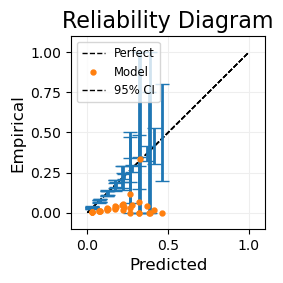

In [75]:
figure (figsize=(2.5,2.5))
mli.plot_reliability_diagram(M_test1['golds'], tp1)
mli.plot_reliability_diagram(M_test2['golds'], tp2)
mli.plot_reliability_diagram(M_test3['golds'], tp3)
mli.plot_reliability_diagram(M_test4['golds'], tp4)


In [8]:
from betacal import BetaCalibration
from  scipy.stats import beta
from matplotlib.pyplot import figure 


In [3]:
neg_1 = mp1 [np.where(M1['golds']==0)]
neg_2 = mp2 [np.where(M2 ['golds']==0)]
neg_3 = mp3 [np.where(M3 ['golds']==0)]
neg_4 = mp4 [np.where(M4 ['golds']==0)]
pos_1 = mp1 [np.where(M1 ['golds']==1)]
pos_2 = mp2 [np.where(M2 ['golds']==1)]
pos_3 = mp3 [np.where(M3['golds']==1)]
pos_4 = mp4 [np.where(M4 ['golds']==1)]
### TRY BETA

In [6]:
pos = pos_1
subneg = np.random.choice( neg_1, 3*sum(gold1))
p_test = tp1
y_test = M_test1['golds']
synth_size = 5


In [69]:
def iso_smote(pos, subneg, p_test, y_test, 
               synth_size):
        
    a, b, loc, scale = beta.fit(pos, floc=0, fscale=1)
    synth_pos = np.random.beta(a,b,size = int( len(pos)*synth_size ))
    #many_pos = np.concatenate((pos, synth_pos))
    many_pos = synth_pos
    probs = np.concatenate((subneg, many_pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )

    iso =  IsotonicRegression(out_of_bounds = 'clip')
    iso.fit(   (probs), subgold)
    iso_test = iso.predict(    ( p_test) )

    figure (figsize=(2.5,2.5))
    mli.plot_reliability_diagram(y_test,  iso_test)
    return iso_test

array([0.16964286, 0.00697674, 0.21161826, ..., 0.10416667, 0.18888043,
       0.2       ])

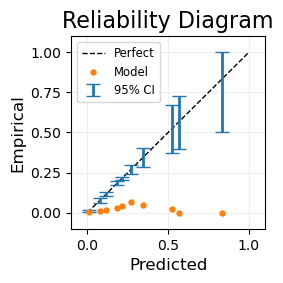

In [70]:
iso_smote(pos_1, subneg=np.random.choice(neg_1, 15*sum(gold1)),
           p_test = tp1, y_test= M_test1['golds'],   synth_size=3)

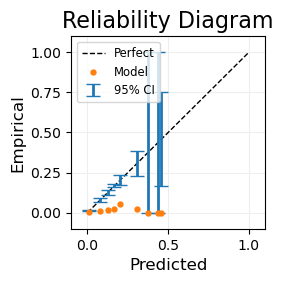

In [23]:
iso_smote(pos_2, subneg=np.random.choice(neg_2, 40*sum(gold2)),
           p_test = tp2, y_test= M_test2['golds'],   synth_size=4.25)

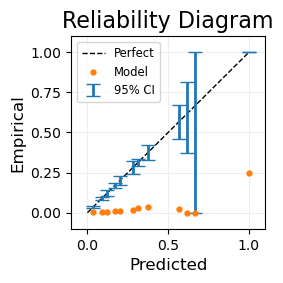

In [58]:
iso_smote(pos_3, subneg=np.random.choice(neg_3, 30*sum(gold3)),
           p_test = tp3, y_test= M_test3['golds'],   synth_size=5.5)

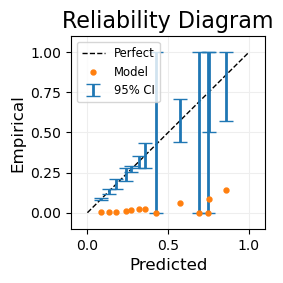

In [53]:
iso_smote(pos_4, subneg=np.random.choice(neg_4, 25*sum(gold4)),
           p_test = tp4, y_test= M_test4['golds'],   synth_size=4.5)